In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [1]:
import os
print(os.listdir("../dataset"))

['aps_failure_training_set_processed_8bit.csv', 'aps_failure_test_set.csv', 'aps_failure_test_set_processed_8bit.csv', 'aps_failure_training_set.csv']


In [11]:
df = pd.read_csv('../dataset/aps_failure_training_set_processed_8bit.csv')

In [12]:
df.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,-0.959115,-0.124611,-0.071121,-0.198529,-0.007737,-0.033483,-0.040633,-0.006584,-0.026241,-0.040699,...,-0.104808,-0.098734,-0.094976,-0.089227,-0.103374,-0.088961,-0.084540,-0.067471,-0.020035,-0.018417
std,0.254040,0.367680,0.356812,0.564872,0.004138,0.107086,0.111752,0.032016,0.065200,0.105864,...,0.356547,0.362066,0.363148,0.336121,0.320314,0.237613,0.363893,0.261009,0.051907,0.061751
min,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
25%,-0.992188,-0.398438,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.343750,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
50%,-0.992188,-0.195312,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.179688,-0.179688,-0.195312,-0.179688,-0.226562,-0.171875,-0.296875,-0.171875,-0.023438,-0.023438
75%,-0.992188,-0.070312,-0.000000,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.007812,0.015625,0.015625,0.007812,-0.054688,-0.101562,-0.000000,-0.132812,-0.023438,-0.023438
max,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,...,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188


In [8]:
df.head();

In [13]:
features = df.drop(['class'], axis=1)
target = df['class']

# split dataset into train and dev set 90:10 %
f_train, f_dev, t_train, t_dev = train_test_split(features, target, test_size=0.1, random_state=42)

In [14]:
np.unique(target)

array([-0.9921875,  0.9921875])

In [15]:
lb = Binarizer()
lb.fit(t_train.values.reshape(-1, 1))
t_train_bi = lb.transform(t_train.values.reshape(-1, 1))
t_dev_bi = lb.transform(t_dev.values.reshape(-1, 1))

In [16]:
np.unique(t_train_bi)

array([0., 1.])

In [17]:
# normalize using standard method
scaler = StandardScaler()
scaler.fit(f_train)
f_nor_train = scaler.transform(f_train)
f_nor_dev = scaler.transform(f_dev)

# select principle components by PCA
pca = PCA(n_components=60)
pca.fit(f_nor_train)
f_pca_train = pca.transform(f_nor_train)
f_pca_dev = pca.transform(f_nor_dev)

<Container object of 60 artists>

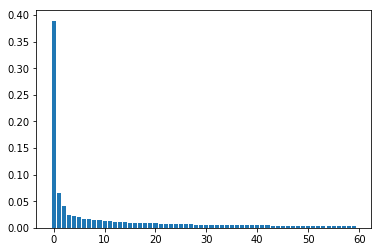

In [18]:
# varince of principle components
plt.bar(range(60),pca.explained_variance_ratio_)


In [49]:
# make a training and dev set
X_train = f_pca_train
X_dev = f_pca_dev
Y_train = t_train_bi.reshape(-1,1)
Y_dev = t_dev_bi.reshape(-1,1)

# Entrenamos SVM

In [52]:
len(Y_train)

54000

In [51]:
len(X_train)

54000

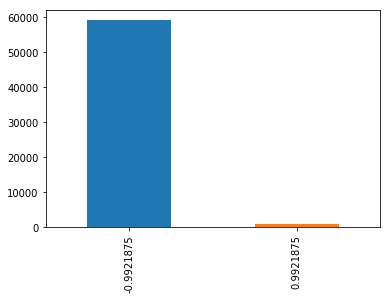

In [53]:
df['class'].value_counts().plot.bar()

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=50)
model.fit(X_train, Y_train)


/Users/paulcristianperccajulca/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = model.score(X_train, Y_train)
tasa_de_error = (1- score)
n_ejemplos = len(X_train)
n_aciertos = n_ejemplos * (1 - tasa_de_error) ## COMPLETAR...
n_errores  = n_ejemplos * tasa_de_error ## COMPLETAR...

In [ ]:
print ('Total de ejemplos: %d' % n_ejemplos)
print ('Exactitud: %0.4f' % score)
print ('Tasa de error: %0.4f' % tasa_de_error)
print ('Número de ejemplos correctamente clasificados: %d' % n_aciertos)
print ('Número de ejemplos incorrectamente clasificados: %d' % n_errores)

In [ ]:
Cs = np.logspace(-2,2,9)  # ~ [0.01, 0.03, 0.1, ..., 100]
gammas = np.logspace(-4,4,9)  # [0.0001, 0.001, ..., 10000]

mejor_modelo = None
mejor_score = 0
for C in Cs:
    for gamma in gammas:
        
        model = SVC(kernel='rbf', C = C, gamma = gamma) ## COMPLETAR...
        model.fit(X_train, Y_train)
        model.fit(X_train, Y_train)
        
        score_val = model.score(X_dev, X_dev) ## COMPLETAR...
        
        if score_val > mejor_score:
            mejor_score = score_val
            mejor_modelo = model


print ('Mejor valor de C: %0.4f' % mejor_modelo.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_modelo.get_params()['gamma'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_modelo.score(X_scaled, y))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_modelo.score(Xval_scaled, yval))


In [ ]:
....